# CURSO: Math & Stat

<img src="img/profile_manoelgadi.png" width=100 height=100 align="right">

Autor: Prof. Manoel Gadi

Contacto: mfalonso@faculty.ie.edu

LinkedIn: https://es.linkedin.com/in/manoel-gadi-97821213

Última revisión: 07/Nov/2022

---

## Session 3 - Inference

## Confidence Intervals 


So far we have focused on sampling distribution and bootstrapping and one of the reasons is because they will be the basis of the two applications we will see:  Confidence Intervals and Hypothesis Testing.


<img src="img/formulas.png" width=500 height=500 align="center">

A __confidence interval__ is a range of values that (hopefully) contain the actual parameter.

We want to be able to conclude, for example, that "We are 95% confident that between 18% and 34% of the population recommends my product."



<img src="img/intervaloconf.jpg" width=300 height=300  align="center">




#### Example: Elections

Suppose an election between only two candidates takes place.  A subset of the voters is surveyed and asked whether they plan to vote for candidate X or candidate Y. In this example our interest will be in looking at sampling variability, that is, the variability in sampling proportions due to the different subjects selected from the population. What is our parameter of interest?
1. The proportion of subjects in a survey who will vote for candidate X.
1. The proportion of all voters who will vote for Candidate X on election day.
1. The sampling variability from poll to poll.

---

Answer: 2

### Error Marginal:

\begin{equation*}
MarginalError = criticalValue*\frac{\sigma }{\sqrt{N}}
\end{equation*}    

Let's use from scipy.stats the command norm.ppf(q = 0.975), which returns the value of the normal for the 97.5% percentile.

In [1]:
import scipy.stats as stats

ValorCritico = stats.norm.ppf(q = 0.975) 
print(ValorCritico)

1.959963984540054


In [2]:
import pandas as pd
df = pd.read_csv("datasets/anorexia.csv")

In [3]:
import numpy as np
MargenDeError = ValorCritico * (np.std(df["prewt"])) / np.sqrt(len(df))
print(MargenDeError)

1.1887246322688207


So the confidence interval is:

In [4]:
print("límite inferior =",np.mean(df["prewt"]) - MargenDeError)
print("promedio =",np.mean(df["prewt"]))
print("límite superior =",np.mean(df["prewt"]) + MargenDeError)

límite inferior = 81.21960870106452
promedio = 82.40833333333333
límite superior = 83.59705796560215


__DISCUSSION QUESTION 1__: What is the above interval for?

---

## PART 5 - Hypothesis Testing!

### P-Value



The British statistician Ronald Fisher was the first to introduce the p-value in the 1920s. His intention was to provide a simple way of assessing whether a result was significant or not, in the old sense of the word: whether it made sense to investigate further in this direction or not. The initial approach to the calculation and interpretation of the p-value did not include cut-off values, such as 0.05 or 0.01.

ref: https://www.mimetis.com/p0-05-descubrimiento-cientifico-valor-p-estadistica/

<img src="img/p_valor.jpg" width=300 height=300  align="center">

### Let's see what the p-value is with an example

If I flip a coin and it comes out __face__, are you suspicious that my coin is tricked or do you think it is honest? what is the probability of that happening?

In [5]:
1 / 2

0.5

If I flip one more coin and it comes out __face__, are you suspicious that my coin is counterfeit or do you think it is honest? what is the probability of that happening?

In [6]:
(1 / 2**2)

0.25

If I flip one more coin and it comes out __face__, are you suspicious that my coin is counterfeit or do you think it is honest? what is the probability of that happening?

In [7]:
(1 / 2**3)

0.125

If I flip one more coin and it comes out __face__, are you suspicious that my coin is counterfeit or do you think it is honest? what is the probability of that happening?

In [8]:
(1 / 2**4)

0.0625

If I flip one more coin and it comes out __face__, are you suspicious that my coin is counterfeit or do you think it is honest? what is the probability of that happening?

In [9]:
(1 / 2**5)

0.03125

The p-value (probability-value), __is this probability value that makes you start to believe that something strange must be happening__. 

In the example of the coins, with a p-value < 5% the coin cannot be normal.

So the H0 hypothesis or NULL hypothesis cannot be true. That is, the hypothesis of normality, of tranquility, of honesty, of __equality__ between my coin and other coins cannot be true.

* H0: the probability of my coin is __=__ (equal) to that of an honest coin.

* H1: the probability is different, i.e., a trick coin. 

So if I flip my coin 5 times and all 5 come up heads, with a p-value of 0.03125 I can __reject the null hypothesis__, which is equivalent to saying that I can __accept the alternative hypothesis__.







Let's paint a histogram with all the possibilities that a normal coin can fall.

In [10]:
sorteos = []
for i in [-1,1]:
    for j in [-1,1]:
        for k in [-1,1]:
            for l in [-1,1]:
                for m in [-1,1]:
                    sorteos.append(i + j + k + l + m)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

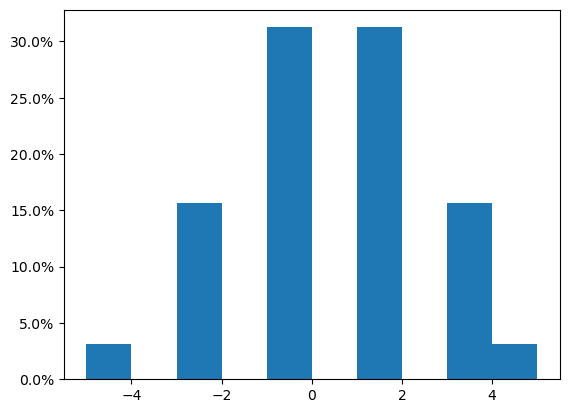

In [12]:
hist, bins = np.histogram(sorteos)
plt.hist(sorteos, weights=np.ones(len(sorteos)) / len(sorteos))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

---

### Has the weight of people in general changed before and after the treatments (one-sample t-test)?

Since we already have the values of difference in weight before and after treatment, we can use a one-sample paired t-test in the 'difwt' column to see if there is a significant change in weights, where the hypothesis is:

* H0: The mean difference is equal to 0.
* H1: The mean difference is not equal to 0.

We can use the [````stats.ttest_1samp(x, mean)```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html) to perform the one-sample t-test, where x is the data and mean is the mean of the population you want to test the data against (in this case, 0). The function returns the test statistic and the p-value respectively.

In [14]:
df.groupby(['group'])['difwt'].mean()

group
1    3.006897
2   -0.450000
3    7.264706
Name: difwt, dtype: float64

In [13]:
# Use the stats.ttest_1samp function to see whether the 'difwt' column
# is different from population mean 0
# and print the result
print("group 1:",stats.ttest_1samp(df['difwt'][df.group==1], 0))
print("group 2:",stats.ttest_1samp(df['difwt'][df.group==2], 0))
print("group 3:",stats.ttest_1samp(df['difwt'][df.group==3], 0))

group 1: Ttest_1sampResult(statistic=2.2155878439311665, pvalue=0.03502259756218877)
group 2: Ttest_1sampResult(statistic=-0.2872253910150259, pvalue=0.7763070622194164)
group 3: Ttest_1sampResult(statistic=4.184908135290033, pvalue=0.0007002531056005393)


We see that if we take p-value = 5%, we would say with statistical certainty that treatment 1 and 3 do work. But the problem is in the sample!

Let's watch a video with an example similar to ours: https://www.youtube.com/watch?v=VPd8DOL13Iw

---

### But are the weights normally distributed (tests for normality)?

There are several ways in which we can test whether a given set of data is normally distributed or not.

Here we present these to you:
* [````scipy.stats.normaltest(x)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#r676), where x is the data matrix.
* [````scipy.stats.shapiro(x)````](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), where x is the data matrix.

Both tests are used to determine whether or not a data set is from a normal distribution. For both tests, the hypothesis is as follows:

* H0: Sample comes from a normal distribution.
* H1: The sample does not come from a normal distribution.

As in the case of the modules, you can access the functions of the stats module using the format ```stats.[function_name]```.

In [14]:
# use the normaltest function to find the test statistic and p-value
# of 'prewt', 'postwt', and 'difwt' column, and print each of them.
# since pandas dataframe is also built on top of arrays,
# you can use the dataframe column selection method directly to use the normaltest

print("pre-weight normal test:",stats.normaltest(df['prewt']))
print("\npost-weight normal test:",stats.normaltest(df['postwt']))
print("\nweight difference normal test:",stats.normaltest(df['difwt']))

pre-weight normal test: NormaltestResult(statistic=0.07182332731282798, pvalue=0.9647255100433293)

post-weight normal test: NormaltestResult(statistic=4.872229098757813, pvalue=0.08750016942113438)

weight difference normal test: NormaltestResult(statistic=2.1365312271308587, pvalue=0.34360394293797336)


Since the p-values are greater than 0.05, we accept the null hypothesis, and say that the samples come from a normal. But that gives us little information.

---

In [15]:
print("pre-weight normal test group 1:",stats.normaltest(df['prewt'][df.group==1]))
print("\npre-weight normal test group 2:",stats.normaltest(df['prewt'][df.group==2]))
print("\npre-weight normal test group 2:",stats.normaltest(df['prewt'][df.group==3]))

pre-weight normal test group 1: NormaltestResult(statistic=2.190665224371193, pvalue=0.33442835350192357)

pre-weight normal test group 2: NormaltestResult(statistic=1.3592413074710437, pvalue=0.506809212085776)

pre-weight normal test group 2: NormaltestResult(statistic=0.6339602402721894, pvalue=0.728345234385914)


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
print("post-weight normal test group 1:",stats.normaltest(df['postwt'][df.group==1]))
print("\npost-weight normal test group 2:",stats.normaltest(df['postwt'][df.group==2]))
print("\npost-weight normal test group 3:",stats.normaltest(df['postwt'][df.group==3]))

post-weight normal test group 1: NormaltestResult(statistic=0.8703912694929079, pvalue=0.64713805200456)

post-weight normal test group 2: NormaltestResult(statistic=1.9224427796417511, pvalue=0.3824255099839377)

post-weight normal test group 3: NormaltestResult(statistic=2.7537110267097002, pvalue=0.25237088354350456)


---

In [17]:
# use the shapiro function to find the test statistic and p-value
# of 'prewt', 'postwt', and 'difwt' column, and print each of them.
# shapiro test also returns test-statistic and p-value respectively

print("pre-weight shapiro test:",stats.shapiro(df['prewt']))
print("\npost-weight shapiro test:",stats.shapiro(df['postwt']))
print("\nweight difference shapiro test:",stats.shapiro(df['difwt']))

pre-weight shapiro test: ShapiroResult(statistic=0.9924839735031128, pvalue=0.948354184627533)

post-weight shapiro test: ShapiroResult(statistic=0.9673006534576416, pvalue=0.05781174451112747)

weight difference shapiro test: ShapiroResult(statistic=0.974664568901062, pvalue=0.15441827476024628)


In [18]:
print("pre-weight shapiro test group 1:",stats.shapiro(df['prewt'][df.group==1]))
print("\npre-weight shapiro test group 2:",stats.shapiro(df['prewt'][df.group==2]))
print("\npre-weight shapiro test group 3:",stats.shapiro(df['prewt'][df.group==3]))

pre-weight shapiro test group 1: ShapiroResult(statistic=0.9699368476867676, pvalue=0.5579800605773926)

pre-weight shapiro test group 2: ShapiroResult(statistic=0.968685507774353, pvalue=0.5895333290100098)

pre-weight shapiro test group 3: ShapiroResult(statistic=0.9882116317749023, pvalue=0.9972156286239624)


## Are the effects of each treatment different (one-way ANOVA)?

Since there are 3 groups, we need to use ANOVA test to determine if the means (weight difference) are the same or not. The hypothesis is as follows:

* H0: Mean (group 1) = Mean (group 2) = Mean (group 3).
* H1: At least one pair has different means.

### Let's look at this video: https://www.youtube.com/watch?v=leHF2OKwT80

We can use the [````stats.f_oneway(a,b,c...)```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to perform a one-way anova test, where a, b, c .. are each of the samples. The function returns the test statistic and p-value respectively.

In [15]:
# create separate dataframes for each of the treatment
group_1 = df[df['group'] == 1]
group_2 = df[df['group'] == 2]
group_3 = df[df['group'] == 3]

In [16]:
# use the stats.f_oneway function to see whether the means of 'difwt' column
# are significantly different for at least one pair
print(stats.f_oneway(group_1['difwt'], group_2['difwt'], group_3['difwt']))

# you can carry out additional tukey's test using
# the statsmodels library :)

F_onewayResult(statistic=5.422296868238271, pvalue=0.006498652980699682)


In [21]:
print(stats.f_oneway(group_1['prewt'], group_2['prewt'], group_3['prewt']))


F_onewayResult(statistic=0.5994852110154862, pvalue=0.5519287433856497)


---